For **feature extraction transfer learning**, you may only train the top 1-3 layers of a pre-trained model with your own data, in **fine-tuning transfer learning**, you might train 1-3+ layers of a pre-trained model (where the '+' indicates that many or all of the layers could be trained).

### **Creating Helper Functions** 

- Store frequenctly used functions in a pyscript and import necessary functionality when you need it.

### **Import Helper Functions**

In [ ]:
# GPU 
!nvidia-smi

Wed Jan 18 00:25:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
     

--2023-01-18 00:25:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-18 00:25:46 (94.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



### **Get the Data**

In [ ]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2023-01-18 00:25:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 2a00:1450:4013:c16::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  41.4MB/s    in 4.6s    

2023-01-18 00:25:54 (35.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# walk through 10 percent data directory and list number of files 
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [ ]:
# create training and testing directories 
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

### **Create Inputs**

In [ ]:
import tensorflow as tf 
image_size = (224, 224)
print('Training Data')
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir, 
    image_size = image_size, 
    label_mode = 'categorical', 
    batch_size = 32
) 

print('Testing data')
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir, 
    image_size = image_size, 
    label_mode = 'categorical', 
    batch_size = 32
)

Training Data
Found 750 files belonging to 10 classes.
Testing data
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### An example of batch data

In [ ]:
for images, labels in train_data_10_percent.take(1): 
  print(images, labels)

tf.Tensor(
[[[[184.2143     170.2143     161.2143    ]
   [185.30612    170.30612    163.30612   ]
   [181.30612    166.30612    160.87755   ]
   ...
   [110.58163     94.857155    69.71939   ]
   [107.903015    95.70918     69.73469   ]
   [104.78573     95.77041     70.4847    ]]

  [[189.2653     172.2653     165.2653    ]
   [184.07652    166.07652    162.07652   ]
   [182.57143    164.57143    162.14285   ]
   ...
   [103.913246    96.586716    70.714264  ]
   [ 99.49995     93.34691     67.352005  ]
   [ 99.21429     96.862236    69.33672   ]]

  [[189.36224    172.14796    161.71939   ]
   [188.5        171.2857     162.91325   ]
   [189.40306    171.40306    166.11736   ]
   ...
   [ 87.54589     83.806114    59.403053  ]
   [ 83.49996     83.35714     57.45916   ]
   [ 81.50511     83.43367     55.78062   ]]

  ...

  [[187.07652    177.07652    141.29079   ]
   [188.0153     178.0153     142.22957   ]
   [188.83163    178.83163    143.66325   ]
   ...
   [206.99997    194.999

### **Model 0: Building a transfer learning model using the keras Functional API**

We're going to go through the following steps:

1. Instantiate a pre-trained base model object by choosing a target model such as **EfficientNetB0** from tf.keras.applications, setting the **include_top parameter** to **False** (we do this because we're going to create our own top, which are the output layers for the model).
2. Set the base model's **trainable** attribute to False to **freeze** all of the weights in the pre-trained model.
3. Define an input layer for our model, for example, what shape of data should our model expect?
4. [Optional] Normalize the inputs to our model if it requires. Some computer vision models such as ResNetV250 require their inputs to be between 0 & 1. 
5. Pass the inputs to the base model.
6. Pool the outputs of the base model into a shape compatible with the output activation layer (turn base model output tensors into same shape as label tensors). This can be done using **tf.keras.layers.GlobalAveragePooling2D()** or **tf.keras.layers.GlobalMaxPooling2D()** though the former is more common in practice.
7. Create an output activation layer using **tf.keras.layers.Dense()** with the appropriate activation function and number of neurons.
8. Combine the inputs and outputs layer into a model using **tf.keras.Model()**.
9. **Compile the model** using the appropriate loss function and choose of optimizer.
10. **Fit the model** for desired number of epochs and with necessary callbacks (in our case, we'll start off with the TensorBoard callback).

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

16705208/16705208 [==============================] - 1s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230118-002603
Epoch 1/5
24/24 [==============================] - 19s 254ms/step - loss: 1.8785 - accuracy: 0.4347 - val_loss: 1.3053 - val_accuracy: 0.7089
Epoch 2/5
24/24 [==============================] - 4s 152ms/step - loss: 1.0975 - accuracy: 0.7560 - val_loss: 0.8791 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 5s 183ms/step - loss: 0.8017 - accuracy: 0.8067 - val_loss: 0.7051 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 4s 155ms/step - loss: 0.6451 - accuracy: 0.8507 - val_loss: 0.6287 - val_accuracy: 0.8454
Epoch 5/5
24/24 [==============================] - 5s 183ms/step - loss: 0.5553 - accuracy: 0.8787 - val_loss: 0.5854 - val_accuracy: 0.8520


In [ ]:
# check layers in our bae mmodel 
for layer_number, layer in enumerate(base_model.layers): 
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
# summary 
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
# summary of model constructed with Functional API 
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.5538 - accuracy: 0.8628


[0.5538396239280701, 0.8628000020980835]

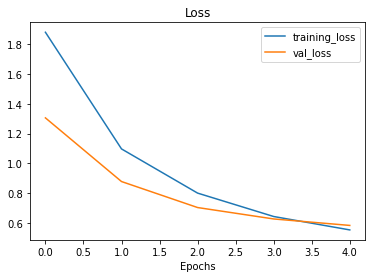

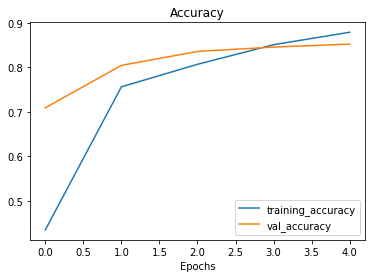

In [ ]:
# plot loss curve 
plot_loss_curves(history_10_percent)

### **Running a Seriess of Transfer Learning Experiments**

1. **model_1**: Use **feature extraction** transfer learning on **1% of the training data with data augmentation.**
2. **model_2**: Use **feature extraction** transfer learning on **10% of the training data with data augmentation**.
3. **model_3**: Use **fine-tuning** transfer learning on **10% of the training data with data augmentation.**
4. **model_4**: Use **fine-tuning** transfer learning on **100% of the training data with data augmentation.** 

- All experiments will be done using the EfficientNetB0 model within the tf.keras.applications module.

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-01-18 00:31:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  37.9MB/s    in 3.7s    

2023-01-18 00:31:09 (34.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'

In [ ]:
import tensorflow as tf
img_size = (224, 224) 
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent, 
    label_mode = 'categorical', 
    batch_size = 32, 
    image_size = img_size
) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, 
    label_mode = 'categorical', 
    batch_size = 32, 
    image_size = img_size
) 

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### **Adding data augmentation right into the model**

1. **RandomFlip** - flips image on horizontal or vertical axis.
2. **RandomRotation** - randomly rotates image by a specified amount.
3. **RandomZoom** - randomly zooms into an image by specified amount.
4. **RandomHeight** - randomly shifts image height by a specified amount.
5. **RandomWidth** - randomly shifts image width by a specified amount.
6. **Rescaling** - normalizes the image pixel values to be between 0 and 1, this is worth mentioning because it is required for some image models but since we're using the tf.keras.applications implementation of EfficientNetB0, it's not required.

In [ ]:
# import necessary libraries 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# create data augmentation 
data_aug = keras.Sequential([
    preprocessing.RandomFlip('horizontal'), 
    preprocessing.RandomRotation(0.2), 
    preprocessing.RandomZoom(0.2), 
    preprocessing.RandomHeight(0.2), 
    preprocessing.RandomWidth(0.2)
], name = 'Data_Augmentation_layer')

(-0.5, 381.5, 511.5, -0.5)

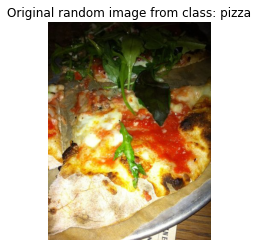

In [ ]:
# view a random image 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import os 
import random 

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class 
random_image = random.choice(os.listdir(target_dir)) 
random_image_path = target_dir + '/' + random_image 
img = mpimg.imread(random_image_path) 
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}') 
plt.axis(False)

(-0.5, 381.5, 511.5, -0.5)

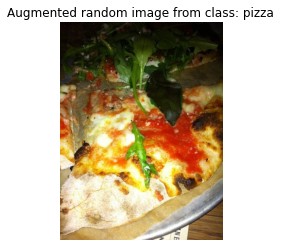

In [ ]:
# augment the image 
aug_img = data_aug(tf.expand_dims(img, axis = 0))
plt.figure()
plt.imshow(tf.squeeze(aug_img)/255.)
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)

### Model 1: Feature Extratction transfer Learning on 1% of the data with data augmentation**

In [ ]:
# set up input ahape, base model, freeze the base model 
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False 

# create input layer 
inputs = layers.Input(shape = input_shape, name = 'input_layer')

# Add in data augmentation Sequential model as a  layer 
x = data_aug(inputs)

# give base model inputs (after augmentation) and don't train it 
x = base_model(x, training = False)

# pool output features of base model 
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)

# put a dense layer on as the output 
outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# make a model with inputs and outputs 
model_1 = keras.Model(inputs, outputs)

In [ ]:
# compile the model 
model_1.compile(loss = 'categorical_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

In [ ]:
# fit the model 
history_1_percent = model_1.fit(train_data_1_percent, 
                                epochs = 5, 
                                steps_per_epoch = len(train_data_1_percent), 
                                validation_data = test_data, 
                                validation_steps = int(0.25 * len(test_data)), 
                                callbacks = [create_tensorboard_callback('transfer_learning', '1_percent_data_aug')])     

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230118-011632
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4488 - accuracy: 0.0714 - val_loss: 2.2690 - val_accuracy: 0.2188
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.2269 - accuracy: 0.2000 - val_loss: 2.1239 - val_accuracy: 0.3092
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9592 - accuracy: 0.3857 - val_loss: 1.9894 - val_accuracy: 0.3668
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7969 - accuracy: 0.5286 - val_loss: 1.8859 - val_accuracy: 0.4194
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6085 - accuracy: 0.6571 - val_loss: 1.7976 - val_accuracy: 0.4688


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 1.8022 - accuracy: 0.4708


[1.8021775484085083, 0.4708000123500824]

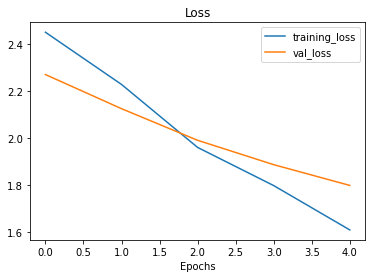

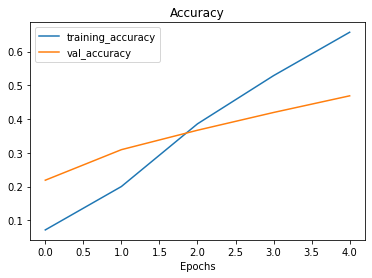

In [ ]:
plot_loss_curves(history_1_percent)

### **Model 2: Feature extraction transfer learning with 10% of data and data augmentation** 

- We're going to run through the exact same steps as the previous model, the only difference being using 10% of the training data instead of 1%.

In [ ]:
print(train_data_10_percent)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


- We could reuse the model we built before by just changing a few things

In [ ]:
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# compile the model 
model_2.compile(loss = 'categorical_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### **Creating a ModelCheckpoint callback** 

The **ModelCheckpoint** callback gives you the ability to save your model, as a whole in the **SavedModel** format or the weights (patterns) only to a specified directory as it trains, 

This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.

For example, say you fit a feature extraction transfer learning model for 5 epochs and you check the training curves and see it was still improving and you want to see if fine-tuning for another 5 epochs could help, you can load the checkpoint, unfreeze some (or all) of the base model layers and then continue training.

In [ ]:
# set checkpoint path 
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path, 
    save_weights_only = True, 
    save_best_only = False, 
    save_freq = 'epoch', 
    verbose = 1
)

In [ ]:
# fit the model 
initial_epochs = 5 
history_10_percent_data_aug = model_2.fit(
    train_data_10_percent, 
    epochs = initial_epochs, 
    validation_data = test_data, 
    validation_steps = int(0.25 * len(test_data)), 
    callbacks = [create_tensorboard_callback('transfer learning', '10_percent_data_aug'), 
                 checkpoint_callback]
)

Saving TensorBoard log files to: transfer learning/10_percent_data_aug/20230118-014510
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.5914 - accuracy: 0.5867
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 21s 621ms/step - loss: 1.5914 - accuracy: 0.5867 - val_loss: 1.1637 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.0874 - accuracy: 0.7467
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 484ms/step - loss: 1.0874 - accuracy: 0.7467 - val_loss: 0.8749 - val_accuracy: 0.7845
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.8735 - accuracy: 0.7853
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 450ms/step - loss: 0.8735 - accuracy: 0.7853 - val_loss: 0.7499 - val_accuracy: 0.8059
E

In [ ]:
# model evaluation 
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 8s 91ms/step - loss: 0.5784 - accuracy: 0.8448


[0.5783519744873047, 0.8447999954223633]

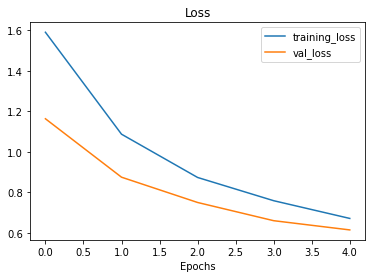

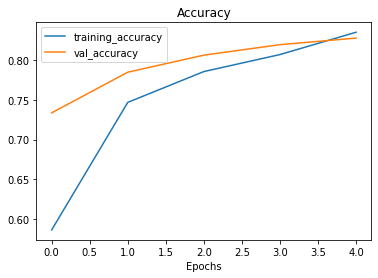

In [ ]:
# plot loss curve 
plot_loss_curves(history_10_percent_data_aug)

- **Looking at these, our model's performance with 10% of the data and data augmentation isn't as good as the model with 10% of the data without data augmentation (see model_0 results above), however the curves are trending in the right direction, meaning if we decided to train for longer, its metrics would likely improve.**

### **Load back in the checkpointed weights**

In [ ]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)
# evaluate model 


79/79 [==============================] - 6s 72ms/step - loss: 0.5784 - accuracy: 0.8448


- Now let's compare the results of our previously trained model and the loaded model. These results should very close if not exactly the same. The reason for minor differences comes down to the precision level of numbers calculated.

In [ ]:
results_10_percent_data_aug == loaded_weights_model_results

False

- If the above cell doesn't output True, it's because the numbers are close but not the exact same (due to how computers store numbers with degrees of precision).

However, they should be very close...

In [ ]:
import numpy as np
# Check to see if loaded model results are very close 
# to native model results (should output True) 
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

### **Model 3: Fine-tuning an existing model on 10% of the data** 

- The idea with fine-tuning is to start customizing the pre-trained model more to our own data.

🔑 **Note**: Fine-tuning usually works best after training a feature extraction model for a few epochs and with large amounts of data

In [ ]:
# layers in model 
model_2.layers

In [ ]:
for layer in model_2.layers: 
  print(layer.trainable)

True
True
False
True
True


In [ ]:
# check which layers are tuneable (trainable) 
for layer_number, layer in enumerate(base_model.layers): 
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

- To fine-tune the base model to our own data, we're going to unfreeze the top 10 layers and continue training our model for another 5 epochs.

- This means all of the base model's layers except for the last 10 will remain frozen and untrainable. And the weights in the remaining unfrozen layers will be updated during training.

1. To begin fine-tuning, we'll unfreeze the entire base model by setting its trainable attribute to **True**. 

2. Then we'll **refreeze** every layer in the base model except for the **last 10** by looping through them and setting their **trainable attribute** to **False**. 

3. Finally, we'll **recompile** the model.

In [ ]:
base_model.trainable = True 

# freeze all layers except for the last 10 
for layer in base_model.layers[:-10]: 
  layer.trainable = False 

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss = 'categorical_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

- Nice! It seems all layers except for the last 10 are frozen and untrainable. This means only the last 10 layers of the base model along with the output layer will have their weights updated during training. 

- In our case, we're using the exact same loss, optimizer and metrics as before, except this time the learning rate for our optimizer will be 10x smaller than before (0.0001 instead of Adam's default of 0.001).

In [ ]:
print(len(model_2.trainable_variables))

12


- looks like our model has a total of 10 trainable variables, the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

To fit **a fine tuned model**, use the **initial_epoch** parameter of the **fit() method**. We'll **pass** it the **last epoch of the previous model's training history** (history_10_percent_data_aug.epoch[-1]).

In [ ]:
# fine tuned for another 5 epochs
fine_tune_epochs = initial_epochs + 5 

# Refit the model (same as model_2 except with more trainable layers) 
history_fine_10_percent_data_aug = model_2.fit(
    train_data_10_percent, 
    epochs = fine_tune_epochs, 
    validation_data = test_data, 
    initial_epoch = history_10_percent_data_aug.epoch[-1], 
    validation_steps = int(0.25 * len(test_data)), 
    callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]
)
     

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230118-030505
Epoch 5/10
24/24 [==============================] - 19s 521ms/step - loss: 0.6512 - accuracy: 0.7893 - val_loss: 0.3935 - val_accuracy: 0.8849
Epoch 6/10
24/24 [==============================] - 10s 396ms/step - loss: 0.3331 - accuracy: 0.9040 - val_loss: 0.4229 - val_accuracy: 0.8602
Epoch 7/10
24/24 [==============================] - 9s 368ms/step - loss: 0.1887 - accuracy: 0.9427 - val_loss: 0.4533 - val_accuracy: 0.8635
Epoch 8/10
24/24 [==============================] - 9s 351ms/step - loss: 0.1356 - accuracy: 0.9600 - val_loss: 0.4634 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 9s 347ms/step - loss: 0.1238 - accuracy: 0.9680 - val_loss: 0.4541 - val_accuracy: 0.8668
Epoch 10/10
24/24 [==============================] - 9s 352ms/step - loss: 0.0850 - accuracy: 0.9813 - val_loss: 0.5043 - val_accuracy: 0.8586


In [ ]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.4619 - accuracy: 0.8640


-  looks like our model has gained a few percentage points of accuracy! 

In [ ]:
def compare_history(original_history, new_history, initial_epochs = 5): 
  '''
  Compares two model history objects.
  ''' 

  # Get original history measurments 
  acc = original_history.history['accuracy']
  loss = original_history.history['loss'] 

  print(len(acc))

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss'] 

  # combine original history with new history 
  total_acc = acc + new_history.history['accuracy'] 
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy'] 
  total_val_loss = val_loss + new_history.history['val_loss'] 

  print(len(total_acc))
  print(total_acc) 

  # make plots 
  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label = 'Training accuracy')
  plt.plot(total_val_acc, label = 'Validation accuracy') 
  plt.plot([initial_epochs-1, initial_epochs-1], 
           plt.ylim(), label = 'Start Fine Tuning')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label = 'Training loss')
  plt.plot(total_val_loss, label = 'Validation loss') 
  plt.plot([initial_epochs-1, initial_epochs-1], 
           plt.ylim(), label = 'Start Fine Tuning')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

5
11
[0.5866666436195374, 0.746666669845581, 0.7853333353996277, 0.8066666722297668, 0.8346666693687439, 0.7893333435058594, 0.9039999842643738, 0.9426666498184204, 0.9599999785423279, 0.9679999947547913, 0.981333315372467]


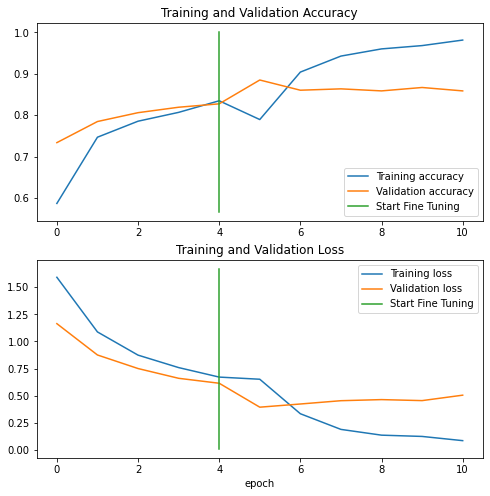

In [ ]:
# compare history 
compare_history(original_history = history_10_percent_data_aug, 
                new_history = history_fine_10_percent_data_aug, 
                initial_epochs = 5)

### **Model 4: Fine-tuning an existing model all of the data** 

- **Download Full Version of Data**

In [ ]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-01-18 03:27:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 2a00:1450:4013:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  39.6MB/s    in 13s     

2023-01-18 03:27:22 (37.5 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

- As it is now, our **model_2 has been fine-tuned on 10 percent of the data**, so to begin fine-tuning on all of the data and keep our experiments consistent, we **need to revert it back to the weights we checkpointed after 5 epochs of feature-extraction.**

In [ ]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=img_size)


Found 7500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 72ms/step - loss: 0.4619 - accuracy: 0.8640


[0.46187201142311096, 0.8640000224113464]

In [ ]:
results_fine_tune_10_percent

[0.4618722200393677, 0.8640000224113464]

In [ ]:
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path) # revert model back to saved weights

In [ ]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.5784 - accuracy: 0.8448


[0.5783520936965942, 0.8447999954223633]

In [ ]:
# Check to see if the above two results are the same (they should be)
results_10_percent_data_aug

[0.5783519744873047, 0.8447999954223633]

Alright, the previous steps might seem quite confusing but all we've done is:

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data (with all base model layers frozen) and saved the model's weights using ModelCheckpoint.
2. Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen.
3. Saved the results and training logs each time.
4. Reloaded the model from 1 to do the same steps as 2 but with all of the data.

The same steps as 2?

- Yeah, we're going to fine-tune the last 10 layers of the base model with the full dataset for another 5 epochs but first let's remind ourselves which layers are trainable.

In [ ]:
# check which layers are tuneable in the whole model 
for layer_number, layer in enumerate(model_2.layers): 
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 Data_Augmentation_layer True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
# check whic layers are tuneable in base model 
for layer_number, layer in enumerate(base_model.layers): 
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

- Looking good! The last 10 layers are trainable (unfrozen).

In [ ]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # divide learning rate by 10 for fine-tuning
                metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# fine tuned for another 5 epochs
fine_tune_epochs = initial_epochs + 5 

# Refit the model (same as model_2 except with more trainable layers) 
history_fine_10_classes_full = model_2.fit(
    train_data_10_classes_full, 
    epochs = fine_tune_epochs, 
    validation_data = test_data, 
    initial_epoch = history_10_percent_data_aug.epoch[-1], 
    validation_steps = int(0.25 * len(test_data)), 
    callbacks = [create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")]
)
     

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230118-040140
Epoch 5/10
235/235 [==============================] - 44s 184ms/step - loss: 0.3203 - accuracy: 0.8955 - val_loss: 0.3052 - val_accuracy: 0.8816
Epoch 6/10
235/235 [==============================] - 39s 166ms/step - loss: 0.2939 - accuracy: 0.9076 - val_loss: 0.2856 - val_accuracy: 0.9062
Epoch 7/10
235/235 [==============================] - 41s 175ms/step - loss: 0.2716 - accuracy: 0.9144 - val_loss: 0.2885 - val_accuracy: 0.8947
Epoch 8/10
235/235 [==============================] - 36s 151ms/step - loss: 0.2483 - accuracy: 0.9225 - val_loss: 0.3094 - val_accuracy: 0.8832
Epoch 9/10
235/235 [==============================] - 36s 149ms/step - loss: 0.2420 - accuracy: 0.9191 - val_loss: 0.2955 - val_accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 34s 144ms/step - loss: 0.2193 - accuracy: 0.9272 - val_loss: 0.3069 - val_accuracy: 0.8980


In [99]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 74ms/step - loss: 0.2761 - accuracy: 0.9016


[0.2761499881744385, 0.9016000032424927]

5
11
[0.5866666436195374, 0.746666669845581, 0.7853333353996277, 0.8066666722297668, 0.8346666693687439, 0.895466685295105, 0.9075999855995178, 0.9143999814987183, 0.9225333333015442, 0.9190666675567627, 0.9272000193595886]


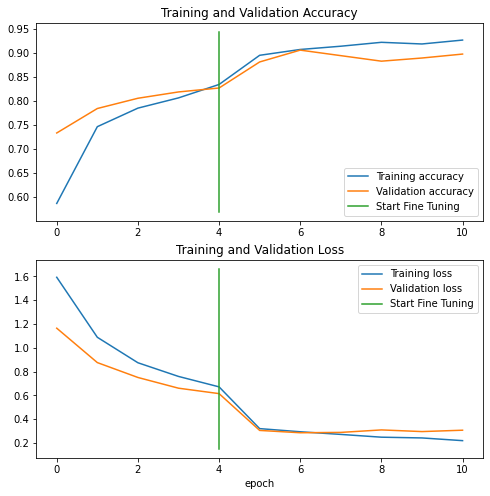

In [100]:
# How did fine-tuning go with more data?
compare_history(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

### **Viewing our experiment data on TensorBoard**

In [105]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=sYu92uLNtaLZqW6x2mFDBboO2vAiEl&prompt=consent&access_type=o